In [1]:
import pandas as pd
import sys
import os

pd.set_option('display.max_columns', 100)
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202


In [2]:
os.chdir('/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial')
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


cpdb_file_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/db/test/v5.0.0/cellphonedb.zip'
meta_file_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/meta_file.tsv'
counts_file_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/processed_adata_final.h5ad'
# microenvs_file_path = 'data/microenvironment.tsv'
out_path = '/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method_2'




Current Working Directory: /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial


In [3]:
metadata = pd.read_csv(meta_file_path, sep = '\t')
metadata.head(3)

,barcode,cell_type
0,AAACCCACATCAGTGT-1,Neuron
1,AAACCCACATGACTAC-1,Neuron
2,AAACCCACATGTTACG-1,Neuron


In [4]:
import anndata

adata = anndata.read_h5ad(counts_file_path)
adata.shape

(8331, 25523)

In [6]:
list(adata.obs.index).sort() == list(metadata['barcode']).sort()


True

In [7]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
    cpdb_file_path = cpdb_file_path,                 # mandatory: CellphoneDB database zip file.
    meta_file_path = meta_file_path,                 # mandatory: tsv file defining barcodes to cell label.
    counts_file_path = counts_file_path,             # mandatory: normalized count matrix - a path to the counts file, or an in-memory AnnData object
    counts_data = 'hgnc_symbol',                     # defines the gene annotation in counts matrix.
    # active_tfs_file_path = active_tf_path,           # optional: defines cell types and their active TFs.
    # microenvs_file_path = microenvs_file_path,       # optional (default: None): defines cells per microenvironment.
    score_interactions = True,                       # optional: whether to score interactions or not. 
    iterations = 1000,                               # denotes the number of shufflings performed in the analysis.
    threshold = 0.1,                                 # defines the min % of cells expressing a gene for this to be employed in the analysis.
    threads = 5,                                     # number of threads to use in the analysis.
    debug_seed = 42,                                 # debug randome seed. To disable >=0.
    result_precision = 3,                            # Sets the rounding for the mean values in significan_means.
    pvalue = 0.05,                                   # P-value threshold to employ for significance.
    subsampling = False,                             # To enable subsampling the data (geometri sketching).
    subsampling_log = False,                         # (mandatory) enable subsampling log1p for non log-transformed data inputs.
    subsampling_num_pc = 100,                        # Number of componets to subsample via geometric skectching (dafault: 100).
    subsampling_num_cells = 1000,                    # Number of cells to subsample (integer) (default: 1/3 of the dataset).
    separator = '|',                                 # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
    debug = False,                                   # Saves all intermediate tables employed during the analysis in pkl format.
    output_path = out_path,                          # Path to save results.
    output_suffix = None                             # Replaces the timestamp in the output files by a user defined string in the  (default: None).
    )

Reading user files...
The following user files were loaded successfully:
/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/processed_adata_final.h5ad
/.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/meta_file.tsv
[ ][CORE][30/07/24-14:05:26][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:42 Threads:5 Precision:3
[ ][CORE][30/07/24-14:05:26][WARNING] Debug random seed enabled. Set to 42
[ ][CORE][30/07/24-14:05:28][INFO] Running Real Analysis
[ ][CORE][30/07/24-14:05:28][INFO] Running Statistical Analysis


100%|██████████| 1000/1000 [01:20<00:00, 12.49it/s]

[ ][CORE][30/07/24-14:06:48][INFO] Building Pvalues result


[ ][CORE][30/07/24-14:06:48][INFO] Building results
[ ][CORE][30/07/24-14:06:48][INFO] Scoring interactions: Filtering genes per cell type..


100%|██████████| 4/4 [00:00<00:00, 34.75it/s]

[ ][CORE][30/07/24-14:06:48][INFO] Scoring interactions: Calculating mean expression of each gene per group/cell type..



100%|██████████| 4/4 [00:00<00:00, 157.98it/s]


[ ][CORE][30/07/24-14:06:49][INFO] Scoring interactions: Calculating scores for all interactions and cell types..


100%|██████████| 16/16 [00:02<00:00,  5.66it/s]


Saved deconvoluted to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method_2/statistical_analysis_deconvoluted_07_30_2024_140652.txt
Saved deconvoluted_percents to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method_2/statistical_analysis_deconvoluted_percents_07_30_2024_140652.txt
Saved means to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method_2/statistical_analysis_means_07_30_2024_140652.txt
Saved pvalues to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method_2/statistical_analysis_pvalues_07_30_2024_140652.txt
Saved significant_means to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method_2/statistical_analysis_significant_means_07_30_2024_140652.txt
Saved interaction_scores to /.mounts/labs/reimandlab/private/users/k2zhang/TIA18674.20211202/cpdb_tutorial/results/method_2/st

In [9]:
list(cpdb_results.keys())


,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,directionality,classification,Astrocyte|Astrocyte,Astrocyte|Microglia,Astrocyte|Neuron,Astrocyte|Oligodendrocyte,Microglia|Astrocyte,Microglia|Microglia,Microglia|Neuron,Microglia|Oligodendrocyte,Neuron|Astrocyte,Neuron|Microglia,Neuron|Neuron,Neuron|Oligodendrocyte,Oligodendrocyte|Astrocyte,Oligodendrocyte|Microglia,Oligodendrocyte|Neuron,Oligodendrocyte|Oligodendrocyte
0,CPI-SC0A2DB962D,CDH1_integrin_a2b1_complex,simple:P12830,complex:integrin_a2b1_complex,CDH1,NaN,False,False,False,curated,True,Adhesion-Adhesion,Adhesion by Cadherin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,CPI-SC0B5CEA47D,COL10A1_integrin_a2b1_complex,simple:Q03692,complex:integrin_a2b1_complex,COL10A1,NaN,True,False,False,curated,True,Adhesion-Adhesion,Adhesion by Collagen/Integrin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [32]:
cpdb_results['pvalues'].head(2)


,id_cp_interaction,interacting_pair,partner_a,partner_b,gene_a,gene_b,secreted,receptor_a,receptor_b,annotation_strategy,is_integrin,directionality,classification,Astrocyte|Astrocyte,Astrocyte|Microglia,Astrocyte|Neuron,Astrocyte|Oligodendrocyte,Microglia|Astrocyte,Microglia|Microglia,Microglia|Neuron,Microglia|Oligodendrocyte,Neuron|Astrocyte,Neuron|Microglia,Neuron|Neuron,Neuron|Oligodendrocyte,Oligodendrocyte|Astrocyte,Oligodendrocyte|Microglia,Oligodendrocyte|Neuron,Oligodendrocyte|Oligodendrocyte
0,CPI-SC0A2DB962D,CDH1_integrin_a2b1_complex,simple:P12830,complex:integrin_a2b1_complex,CDH1,NaN,False,False,False,curated,True,Adhesion-Adhesion,Adhesion by Cadherin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,CPI-SC0B5CEA47D,COL10A1_integrin_a2b1_complex,simple:Q03692,complex:integrin_a2b1_complex,COL10A1,NaN,True,False,False,curated,True,Adhesion-Adhesion,Adhesion by Collagen/Integrin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
cpdb_results['deconvoluted'].head(2)


,gene_name,uniprot,is_complex,protein_name,complex_name,id_cp_interaction,gene,Astrocyte,Microglia,Neuron,Oligodendrocyte
multidata_id,,,,,,,,,,,
1355,UBASH3B,Q8TF42,True,UBS3B_HUMAN,Dehydroepiandrosterone_bySTS,CPI-CS09B8977D7,UBASH3B,0.026,0.257,0.045,0.02
1355,UBASH3B,Q8TF42,True,UBS3B_HUMAN,Dehydroepiandrosterone_bySTS,CPI-CS05760BB78,UBASH3B,0.026,0.257,0.045,0.02


In [1]:
from cellphonedb.utils import search_utils

search_results = search_utils.search_analysis_results(
    query_cell_types_1 = ['Neuron', 'Astrocyte', 'Oligodendrocyte', 'Microglia'],  # List of cells 1, will be paired to cells 2 (list or 'All').
    query_cell_types_2 = ['Microglia'],     # List of cells 2, will be paired to cells 1 (list or 'All').
    query_genes = ['TGFBR1'],                                       # filter interactions based on the genes participating (list).
    query_interactions = ['CSF1_CSF1R'],                            # filter intereactions based on their name (list).
    significant_means = cpdb_results['significant_means'],          # significant_means file generated by CellphoneDB.
    deconvoluted = cpdb_results['deconvoluted'],                    # devonvoluted file generated by CellphoneDB.
    interaction_scores = cpdb_results['interaction_scores'],        # interaction score generated by CellphoneDB.
    query_minimum_score = 50,                                       # minimum score that an interaction must have to be filtered.
    separator = '|',                                                # separator (default: |) employed to split cells (cellA|cellB).
    long_format = True,                                             # converts the output into a wide table, removing non-significant interactions
    query_classifications = ['Signaling by Transforming growth factor']
)

search_results

NameError: name 'cpdb_results' is not defined

In [49]:
from cellphonedb.utils import search_utils

search_results = search_utils.search_analysis_results(
    query_cell_types_1 = ['Microglia'],  # List of cells 1, will be paired to cells 2 (list or 'All').
    query_cell_types_2 = ['Neuron', 'Astrocyte', 'Oligodendrocyte', 'Microglia'],     # List of cells 2, will be paired to cells 1 (list or 'All').
    query_genes = ['TGFBR1', ],                                       # filter interactions based on the genes participating (list).
    query_interactions = ['CSF1_CSF1R'],                            # filter intereactions based on their name (list).
    significant_means = cpdb_results['significant_means'],          # significant_means file generated by CellphoneDB.
    deconvoluted = cpdb_results['deconvoluted'],                    # devonvoluted file generated by CellphoneDB.
    interaction_scores = cpdb_results['interaction_scores'],        # interaction score generated by CellphoneDB.
    query_minimum_score = 50,                                       # minimum score that an interaction must have to be filtered.
    separator = '|',                                                # separator (default: |) employed to split cells (cellA|cellB).
    long_format = True,                                             # converts the output into a wide table, removing non-significant interactions
    query_classifications = ['Signaling by Transforming growth factor']
)

search_results

,interacting_pair,partner_a,partner_b,gene_a,gene_b,directionality,classification,interacting_cells,significant_mean
0,TGFB2_TGFbeta_receptor1,simple:P61812,complex:TGFbeta_receptor1,TGFB2,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Astrocyte|Microglia,0.384
1,TGFB2_TGFbeta_receptor2,simple:P61812,complex:TGFbeta_receptor2,TGFB2,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Astrocyte|Microglia,0.123
2,TGFB1_TGFbeta_receptor2,simple:P01137,complex:TGFbeta_receptor2,TGFB1,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Astrocyte|Microglia,0.050
3,CSF1_CSF1R,simple:P09603,simple:P07333,CSF1,CSF1R,Ligand-Receptor,Signaling by Colony-Stimulating factor,Astrocyte|Microglia,0.499
4,TGFB1_TGFbeta_receptor1,simple:P01137,complex:TGFbeta_receptor1,TGFB1,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Astrocyte|Microglia,0.311
7,TGFB1_TGFbeta_receptor2,simple:P01137,complex:TGFbeta_receptor2,TGFB1,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Microglia|Microglia,0.248
8,CSF1_CSF1R,simple:P09603,simple:P07333,CSF1,CSF1R,Ligand-Receptor,Signaling by Colony-Stimulating factor,Microglia|Microglia,0.474
9,TGFB1_TGFbeta_receptor1,simple:P01137,complex:TGFbeta_receptor1,TGFB1,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Microglia|Microglia,0.509
10,TGFB2_TGFbeta_receptor1,simple:P61812,complex:TGFbeta_receptor1,TGFB2,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Oligodendrocyte|Microglia,0.322
11,TGFB2_TGFbeta_receptor2,simple:P61812,complex:TGFbeta_receptor2,TGFB2,NaN,Ligand-Receptor,Signaling by Transforming growth factor,Oligodendrocyte|Microglia,0.061


In [51]:


# Assuming search_results is a list of dictionaries or a DataFrame
# Convert the search_results to a DataFrame if it's not already
search_results_df = pd.DataFrame(search_results)

# Write the DataFrame to a CSV file
search_results_df.to_csv('cellphonedb_search_results.csv', index=False)


In [53]:
from cellphonedb.utils import search_utils

# List of genes to query
genes_to_query = [
    'TGFBR1', "AIF1", "C1QA", "CSF1R",
    "STMN2", "TUBB3",
    "GFAP", "AQP4", "ALDH1L1",
    "OLIG1", "OLIG2", "PDGFRA",
    "PLP1", "MBP"
]

# List of interactions to query
interactions_to_query = [
    'CSF1_CSF1R',  # example interaction; you can add more if needed
]

# Perform search for interactions involving specified genes and interactions
search_results = search_utils.search_analysis_results(
    query_cell_types_1 = ['Microglia'],
    query_cell_types_2 = ['Neuron', 'Astrocyte', 'Oligodendrocyte', 'Microglia'],
    query_genes = genes_to_query,
    query_interactions = interactions_to_query,
    significant_means = cpdb_results['significant_means'],
    deconvoluted = cpdb_results['deconvoluted'],
    interaction_scores = cpdb_results['interaction_scores'],
    query_minimum_score = 50,
    separator = '|',
    long_format = True,
    query_classifications = ['Signaling by Transforming growth factor']  # Example classification
)

search_results

search_results_df = pd.DataFrame(search_results)
search_results_df.to_csv('cellphonedb_search_genes_from_scanpy.tsv', sep='\t', index=False)

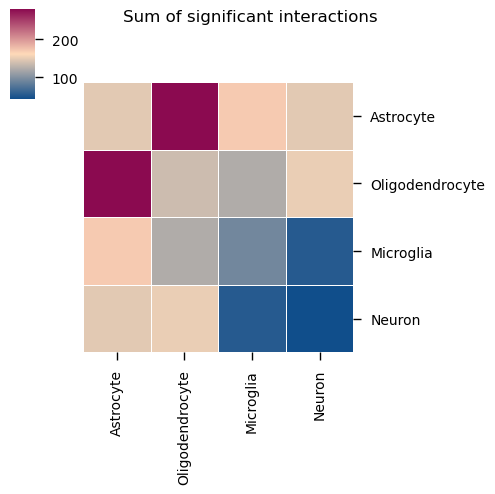

In [18]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
%matplotlib inline

kpy.plot_cpdb_heatmap(pvals = cpdb_results['pvalues'],
                      degs_analysis = False,
                      figsize = (5, 5),
                      title = "Sum of significant interactions")


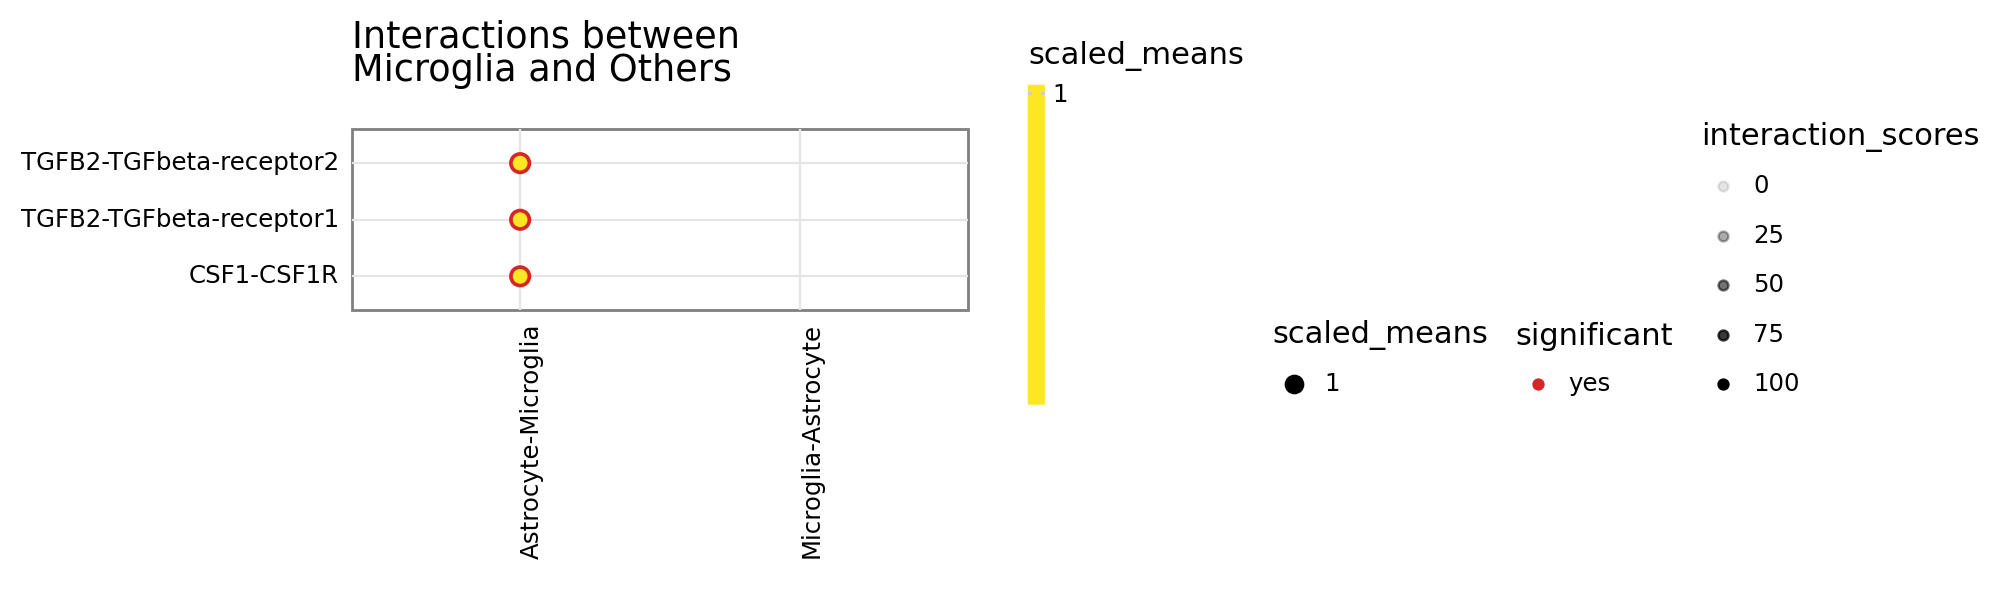

<Figure Size: (1000 x 300)>

In [71]:
kpy.plot_cpdb(
    adata = adata,
    cell_type1 = "Microglia",
    cell_type2 = "Astrocyte",
    means = cpdb_results['means'],
    pvals = cpdb_results['pvalues'],
    celltype_key = "cell_type_lvl1",
    genes = ["TGFB2", "CSF1R"],
    figsize = (10, 3),
    title = "Interactions between\nMicroglia and Others",
    max_size = 3,
    highlight_size = 0.75,
    degs_analysis = False,
    standard_scale = True,
    interaction_scores = cpdb_results['interaction_scores'],
    scale_alpha_by_interaction_scores = True
)


In [56]:
adata

AnnData object with n_obs × n_vars = 8331 × 25523
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_res_0.02', 'leiden_res_0.50', 'leiden_res_2.00', 'cell_type_lvl1'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_lvl1_colors', 'dendrogram_leiden_res_0.50', 'hvg', 'leiden', 'leiden_colors', 'leiden_res_0.02', '

In [ ]:
#Classify output into four groups by all - microglia 
# if more than 10 , separate by ligand and receptor
#rank by p-value instead within the groups
# compare astrocyte and neuron, compare how many are overlapping and what is unique for astrocyte and neuron

# for the whole dataset, how many inetreaction are there
